<a href="https://colab.research.google.com/github/fsaudm/NeuralNet_in_NumPy/blob/main/Neural_Network_in_NP_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Neural Network using NumPy for *Fashion* MNIST

**Note**

For 2-D arrays, np.dot performs matrix multiplication. To be more readable and explicit:
- **np.matmul()** is used for matrix multiplication
- "*" is used for element-wise multiplication

In [1]:
# Importing mighty NumPy!
import numpy as np

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Flatten the images
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Flatten y
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 784)
y_train shape: (60000, 1)
X_test shape: (10000, 784)
y_test shape: (10000, 1)


In [3]:
print(f"Label distribution in y_train: \n {np.unique(y_train, return_counts=True)} \n")
print(f"Label distribution in y_test: \n {np.unique(y_test, return_counts=True)}")

Label distribution in y_train: 
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])) 

Label distribution in y_test: 
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


## Neural Network definition & Functions

In [4]:
# @title ReLu
def relu(array):
    return np.maximum(0, array)  # Vectorized ReLU

In [5]:
# @title Softmax
def softmax(array):
    # Clip values to prevent overflow
    array = np.clip(array, -500, 500)
    exps = np.exp(array - np.max(array, axis=1, keepdims=True)) # Substract the max, broadcast
    return exps / np.sum(exps, axis=1, keepdims=True)  # Divide by sum, broadcast

In [6]:
# @title Predict Y
def predict_y(array):
    return np.argmax(array, axis=1)  # Divide by sum, broadcast

In [7]:
# @title One-hot encoding for Labels
def one_hot_encode(y, n_classes = 10):
    return np.eye(n_classes)[y].reshape(-1, n_classes)

In [8]:
# @title Cross-entropy
def cross_entropy_loss(y_true, y_pred):
    loss = -np.mean(y_true * np.log(y_pred + 1e-9)) # Average loss over the batch
    return loss

### Network Architecture & Params

In [9]:
# @title Parameters
def initialize_parameters(input_dim, hidden1_dim, hidden2_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden1_dim) * np.sqrt(2. / input_dim)
    b1 = np.zeros((1, hidden1_dim))
    W2 = np.random.randn(hidden1_dim, hidden2_dim) * np.sqrt(2. / hidden1_dim)
    b2 = np.zeros((1, hidden2_dim))
    W3 = np.random.randn(hidden2_dim, output_dim) * np.sqrt(2. / hidden2_dim)
    b3 = np.zeros((1, output_dim))
    return W1, W2, W3, b1, b2, b3

In [10]:
# @title Forward pass, Vetorized!
np.random.seed(77)

i=10
x = X_train[:i]
y = y_train[:i]
num_classes = 10

# Initialize parameters
input_dim = 784
hidden1_dim = 128
hidden2_dim = 64
output_dim = 10

W1, W2, W3, b1, b2, b3 = initialize_parameters(input_dim, hidden1_dim, hidden2_dim, output_dim)

### Network Example
### 1 forward pass
# From input to hidden 1
z1 = np.matmul(x,W1) + b1
a1 = relu(z1)

# From hidden 1 to hidden 2
z2 = np.matmul(a1,W2) + b2
a2 = relu(z2)

# From hidden 2 to output
z3 = np.matmul(a2,W3) + b3
a3 = softmax(z3)

# From output to prediction
y_hat = predict_y(a3).reshape(-1,1)

# Calculate loss
loss = cross_entropy_loss(one_hot_encode(y, num_classes), a3)



# Results:
print(f"Probabilies:\n {a3}, shape: {a3.shape}\n")
print(f"Predicted Y:\n {y_hat}, shape: {y_hat.shape}\n")
print(f"Actual Y:\n {y_train[:i]}, shape: {y_train[:i].shape}\n")
print(f"Loss:\n {loss}\n")


# Shapes:
print(f"Input shape: {x.shape}")
print(f"Predicted Y shape: {y_hat.shape}")

print(f"Parameters W1 shape: {W1.shape}")
print(f"Parameters b1 shape: {b1.shape}")
print(f"Parameters W2 shape: {W2.shape}")
print(f"Parameters b2 shape: {b2.shape}")
print(f"Parameters W3 shape: {W3.shape}")
print(f"Parameters b3 shape: {b3.shape}")

Probabilies:
 [[0.08650725 0.05702268 0.06608429 0.05658622 0.05108793 0.0901224
  0.10010525 0.0470514  0.25879216 0.18664042]
 [0.05634977 0.01601526 0.03880536 0.06351597 0.10359667 0.08037985
  0.10678997 0.03601245 0.22778365 0.27075104]
 [0.10685274 0.03441664 0.08158345 0.06853418 0.11771474 0.08811645
  0.12929595 0.052755   0.15163768 0.16909317]
 [0.07636799 0.02275297 0.05306574 0.08419851 0.09541571 0.11172897
  0.13979769 0.04721665 0.19465369 0.17480208]
 [0.10128444 0.01029225 0.07446325 0.02585618 0.08917662 0.05192217
  0.10269559 0.01905737 0.28142956 0.24382257]
 [0.08514709 0.02333356 0.05862734 0.05881846 0.07726048 0.05904967
  0.15205052 0.05822344 0.17937466 0.24811478]
 [0.08169904 0.03861366 0.07890627 0.10447165 0.0980242  0.09666473
  0.14679507 0.03571276 0.18210493 0.13700769]
 [0.04909953 0.00986098 0.0738184  0.03007237 0.05009334 0.0715083
  0.09872245 0.05392796 0.25692162 0.30597505]
 [0.07714542 0.0749563  0.08549604 0.06111055 0.12260233 0.0756747
 

### Back Propagation

In [11]:
# @title ReLu 'prime'
def relu_prime(array):
    return np.where(array > 0, 1, 0) ## Boolean for z>0, 1, 0

No need for "Softmax prime". A softmax function followed by a cross-entropy function is a combination that works very well, and the derivative is quite simple.

In [12]:
# @title Backwards pass, updating parameters

### Network Example
### backwards pass
### Division by m is to average the gradients over all observations in the batch.

m = y.shape[0]  # Number of examples

# Step 1: Calculate error at the output layer
delta3 = a3 - one_hot_encode(y, num_classes) # daL/dzL * dC/daL

# Step 2: Calculate gradients for W3 and b3
dW3 = np.matmul(a2.T, delta3) / m  # dzL/dWL
db3 = np.sum(delta3, axis=0, keepdims=True) / m  # dzL/dbL

# Step 3: Propagate the error to hidden layer 2
delta2 = np.matmul(delta3, W3.T) * relu_prime(z2)  #  da(L-1)/dz(L-1) * dzL/da(L-1)

# Step 4: Calculate gradients for W2 and b2
dW2 = np.matmul(a1.T, delta2) / m  # dz(L-1)/dW(L-1)
db2 = np.sum(delta2, axis=0, keepdims=True) / m  # dz(L-1)/db(L-1)

# Step 5: Propagate the error to hidden layer 1
delta1 = np.matmul(delta2, W2.T) * relu_prime(z1)  # da(L-2)/dz(L-2) * dz(L-1)/da(L-2)

# Step 6: Calculate gradients for W1 and b1
dW1 = np.matmul(x.T, delta1) / m  # dz(L-2)/dW(L-2)
db1 = np.sum(delta1, axis=0, keepdims=True) / m  # dz(L-2)/db(L-2)


### Parameters update
lr = 3e-2

# Update weights and biases
W1 -= lr * dW1
b1 -= lr * db1
W2 -= lr * dW2
b2 -= lr * db2
W3 -= lr * dW3
b3 -= lr * db3

## Training

In [13]:
def forward_pass(x, y, num_classes, W1, W2, W3, b1, b2, b3):

  # From input to hidden 1
  z1 = np.matmul(x,W1) + b1
  a1 = relu(z1)

  # From hidden 1 to hidden 2
  z2 = np.matmul(a1,W2) + b2
  a2 = relu(z2)

  # From hidden 2 to output
  z3 = np.matmul(a2,W3) + b3
  a3 = softmax(z3)

  # From output to prediction
  y_hat = predict_y(a3).reshape(-1,1)

  # Calculate loss
  loss = cross_entropy_loss(one_hot_encode(y, num_classes), a3)

  return loss, y_hat, a3, a2, a1, z3, z2, z1


def backwards_pass(x, y, num_classes, lr, a3, a2, a1, W1, W2, W3, b1, b2, b3, z1, z2, z3):
  ### Error propagation
  m = y.shape[0]  # Number of examples

  delta3 = a3 - one_hot_encode(y, num_classes)
  dW3 = np.matmul(a2.T, delta3) / m
  db3 = np.sum(delta3, axis=0, keepdims=True) / m

  delta2 = np.matmul(delta3, W3.T) * relu_prime(z2)
  dW2 = np.matmul(a1.T, delta2) / m
  db2 = np.sum(delta2, axis=0, keepdims=True) / m

  delta1 = np.matmul(delta2, W2.T) * relu_prime(z1)
  dW1 = np.matmul(x.T, delta1) / m
  db1 = np.sum(delta1, axis=0, keepdims=True) / m

  # Update weights and biases
  W1 -= lr * dW1
  b1 -= lr * db1
  W2 -= lr * dW2
  b2 -= lr * db2
  W3 -= lr * dW3
  b3 -= lr * db3

  return W1, W2, W3, b1, b2, b3

### Training loop

In [14]:
%pip install wandb -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.1 MB/s eta 0:00:00


In [15]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy & Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Logging
import wandb
from tqdm import tqdm

# Use wandb-core, temporary for wandb's new backend
wandb.require("core")
wandb.login()

#wandb login --relogin

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [16]:
def plot_confusion_matrix(y_true, y_pred, figsize=(10, 8), cmap="viridis"):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
    plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_true, y_pred):.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Training Progress: 100%|██████████| 100/100 [13:10<00:00,  7.91s/it]


train_accuracy,▂▁▁▄▃▃▄▅▆▆▇▇▆▅▆▆▇▇▇▇▇▇█▇▇██▇▇▇▇████████▇
train_loss,█▅▄▄▄▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁
val_accuracy,▂▁▁▂▄▃▃▆▅▇▅▆▇▆▇▇▆▆▇▇▆▇▇▇███▇▇▇▇███▇█▇███
val_loss,█▅▄▃▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_accuracy,0.80793
train_loss,0.05144
val_accuracy,0.7983
val_loss,0.05389


Number of parameters: 533733

Input shape: (60000, 784)
Parameters W1 shape: (784, 511)
Parameters b1 shape: (1, 511)
Parameters W2 shape: (511, 254)
Parameters b2 shape: (1, 254)
Parameters W3 shape: (254, 10)
Parameters b3 shape: (1, 10)
Predicted Y shape: (10, 1)


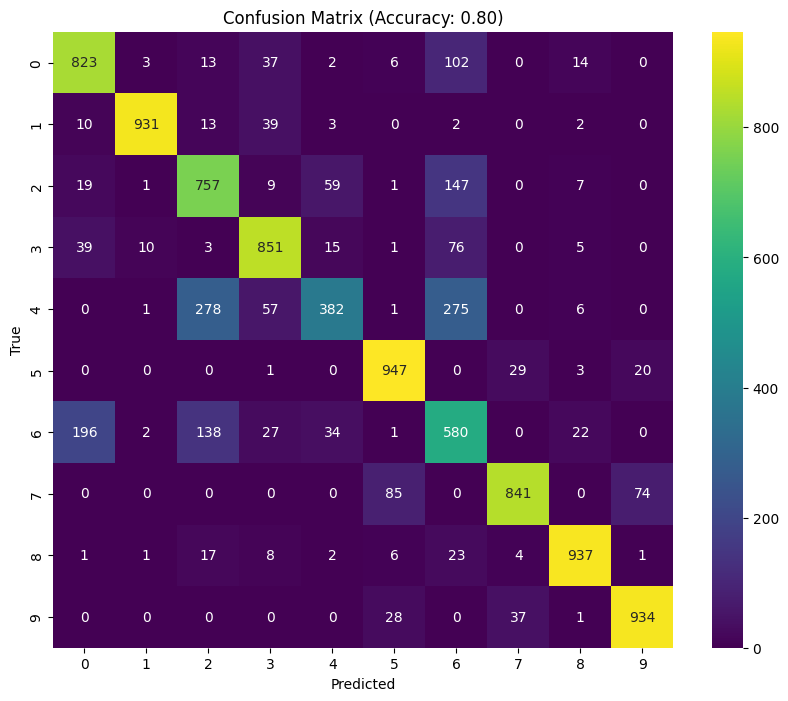

In [51]:
# Random seed
np.random.seed(42)

# Initialize wandb
wandb.init(project="Fashion-mnist-neural-network")


X = X_train
Y = y_train
num_classes = 10

x_test = X_test
y_test = y_test

# Initialize parameters
input_dim = 784
hidden1_dim = 511
hidden2_dim = 254
output_dim = num_classes

W1, W2, W3, b1, b2, b3 = initialize_parameters(input_dim, hidden1_dim, hidden2_dim, output_dim)
num_params = W1.size + W2.size + W3.size + b1.size + b2.size + b3.size

# Learning rate & Epochs
lr=3e-1
epochs = 100

## Training loop
for epoch in tqdm(range(epochs), desc="Training Progress"):

  ## Random Batches
  # Shuffle the array
  random_indices = np.random.randint(0, len(Y), size=(len(Y)))
  x = X[random_indices]
  y = Y[random_indices]

  ## Training
  # Forward pass
  training_loss, y_hat_tr, a3, a2, a1, z3, z2, z1 = forward_pass(x, y, num_classes, W1, W2, W3, b1, b2, b3)

  # Backwards pass
  W1, W2, W3, b1, b2, b3 = backwards_pass(x, y, num_classes, lr, a3, a2, a1, W1, W2, W3, b1, b2, b3, z1, z2, z3)

  ## Validation
  # Forward pass
  val_loss, y_hat_val, _, _, _, _, _, _ = forward_pass(x_test, y_test, num_classes, W1, W2, W3, b1, b2, b3)

  ## Logging
  train_accuracy = accuracy_score(y, y_hat_tr)
  val_accuracy = accuracy_score(y_test, y_hat_val)

  ## Logging with wandb
  wandb.log({"train_loss": training_loss, "val_loss": val_loss, "train_accuracy": train_accuracy, "val_accuracy": val_accuracy})

## Logging
wandb.config.activation_function = "relu"
wandb.config.batch_size = len(Y)
wandb.config.epochs = epochs
wandb.config.input_dims = input_dim
wandb.config.hidden_layer_1 = hidden1_dim
wandb.config.hidden_layer_2 = hidden2_dim
wandb.config.output = output_dim
wandb.config.learning_rate = lr
wandb.config.loss_function = "cross_entropy"
wandb.config.parameters = num_params

wandb.finish()

# Number of parameters
print(f"Number of parameters: {num_params}")
print()

# Shapes:
print(f"Input shape: {x.shape}")
print(f"Parameters W1 shape: {W1.shape}")
print(f"Parameters b1 shape: {b1.shape}")
print(f"Parameters W2 shape: {W2.shape}")
print(f"Parameters b2 shape: {b2.shape}")
print(f"Parameters W3 shape: {W3.shape}")
print(f"Parameters b3 shape: {b3.shape}")
print(f"Predicted Y shape: {y_hat.shape}")

plot_confusion_matrix(y_test, y_hat_val)

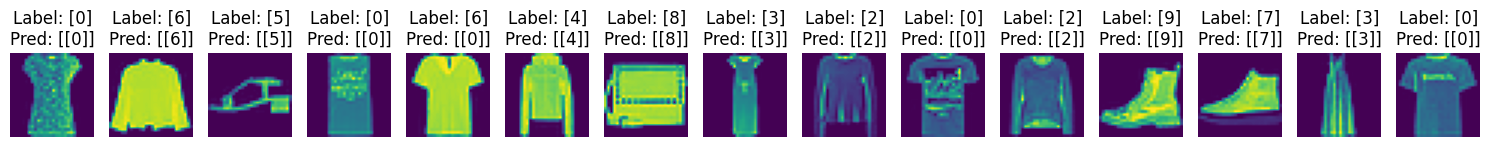

In [52]:
num_imgs = 15

# Create a figure with subplots
fig, axes = plt.subplots(1, num_imgs, figsize=(15, 3))

for i in range(num_imgs):
    # Randomly select an index
    random_index = np.random.randint(0, len(X_test))
    x_obs = X_test[random_index]  # Select the image at the random index
    y_obs = y_test[random_index]  # Select the corresponding label

    # Forward pass to get the prediction
    _ , prediction, _, _, _, _, _, _ = forward_pass(x_obs, y_obs, num_classes, W1, W2, W3, b1, b2, b3)

    # Visualize the digit
    axes[i].imshow(x_obs.reshape(28, 28), cmap='viridis')
    axes[i].set_title(f'Label: {y_obs}\nPred: {prediction}')
    axes[i].axis('off')  # Turn off the axes

# Adjust layout and show the plot
plt.tight_layout()
plt.show()